In [1]:
# Import the  library.
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the API key.
from config import api_key


In [3]:
# Create a practice set of random latitude and longitude combinations.
lat = np.random.uniform(low=-90.000, high=90.000, size=5000)
lon = np.random.uniform(low=-90.000, high=90.000, size=5000)
lat_lon = zip(lat, lon)


In [4]:
#Convert to list
coordinates = list(lat_lon)

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
#Create a list for holding the cities
cities = []

#identify nearest city to lat-long
for coordinate in coordinates:
        city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

        #If city not unique then add to cities list
        if city not in cities:
            cities.append(city)
#Print city count
len(cities)

1445

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + "7050ec972e30cd5376f1e59c3b1ee70f"
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7050ec972e30cd5376f1e59c3b1ee70f


In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | dikson
Processing Record 2 of Set 1 | sandy bay
Processing Record 3 of Set 1 | busselton
Processing Record 4 of Set 1 | puerto carreno
Processing Record 5 of Set 1 | bredasdorp
Processing Record 6 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 7 of Set 1 | warqla
City not found. Skipping...
Processing Record 8 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 9 of Set 1 | bambous virieux
Processing Record 10 of Set 1 | arraial do cabo
Processing Record 11 of Set 1 | narsaq
Processing Record 12 of Set 1 | amapa
Processing Record 13 of Set 1 | patos de minas
Processing Record 14 of Set 1 | east london
Processing Record 15 of Set 1 | husavik
Processing Record 16 of Set 1 | clyde river
Processing Record 17 of Set 1 | cape town
Processing Record 18 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 19 of Set 1 | punta arenas
Processing Rec

Processing Record 36 of Set 4 | pictou
Processing Record 37 of Set 4 | aktash
Processing Record 38 of Set 4 | polunochnoye
Processing Record 39 of Set 4 | ampanihy
Processing Record 40 of Set 4 | kita
Processing Record 41 of Set 4 | luderitz
Processing Record 42 of Set 4 | the valley
Processing Record 43 of Set 4 | san cristobal
Processing Record 44 of Set 4 | bundibugyo
Processing Record 45 of Set 4 | toliary
City not found. Skipping...
Processing Record 46 of Set 4 | muros
Processing Record 47 of Set 4 | torbay
Processing Record 48 of Set 4 | sept-iles
Processing Record 49 of Set 4 | nouadhibou
Processing Record 50 of Set 4 | yellamanchili
City not found. Skipping...
Processing Record 1 of Set 5 | kalmunai
Processing Record 2 of Set 5 | salalah
Processing Record 3 of Set 5 | quatre cocos
Processing Record 4 of Set 5 | akhnur
Processing Record 5 of Set 5 | belmonte
Processing Record 6 of Set 5 | mollendo
Processing Record 7 of Set 5 | camapua
Processing Record 8 of Set 5 | qaqortoq
Pr

Processing Record 27 of Set 8 | vengurla
Processing Record 28 of Set 8 | valparaiso
Processing Record 29 of Set 8 | virginia beach
Processing Record 30 of Set 8 | khudumelapye
Processing Record 31 of Set 8 | masunga
Processing Record 32 of Set 8 | teguldet
Processing Record 33 of Set 8 | nouakchott
Processing Record 34 of Set 8 | ndele
Processing Record 35 of Set 8 | cabedelo
Processing Record 36 of Set 8 | bayan
Processing Record 37 of Set 8 | tulum
Processing Record 38 of Set 8 | marsh harbour
Processing Record 39 of Set 8 | manacapuru
Processing Record 40 of Set 8 | sandur
Processing Record 41 of Set 8 | marrakesh
Processing Record 42 of Set 8 | porto nacional
Processing Record 43 of Set 8 | kondopoga
Processing Record 44 of Set 8 | raudeberg
Processing Record 45 of Set 8 | buraydah
Processing Record 46 of Set 8 | prieska
Processing Record 47 of Set 8 | sucua
Processing Record 48 of Set 8 | nijar
Processing Record 49 of Set 8 | grand-couronne
Processing Record 50 of Set 8 | port bla

Processing Record 14 of Set 12 | grand gaube
Processing Record 15 of Set 12 | canico
Processing Record 16 of Set 12 | oktyabrskoye
Processing Record 17 of Set 12 | santa maria
Processing Record 18 of Set 12 | saint-francois
Processing Record 19 of Set 12 | katsiveli
City not found. Skipping...
Processing Record 20 of Set 12 | carutapera
Processing Record 21 of Set 12 | tromso
Processing Record 22 of Set 12 | liverpool
Processing Record 23 of Set 12 | chitral
Processing Record 24 of Set 12 | lake city
Processing Record 25 of Set 12 | san ramon
Processing Record 26 of Set 12 | vadamadurai
Processing Record 27 of Set 12 | lucea
Processing Record 28 of Set 12 | le port
Processing Record 29 of Set 12 | beckley
Processing Record 30 of Set 12 | balakhonovskoye
Processing Record 31 of Set 12 | salta
Processing Record 32 of Set 12 | arvika
Processing Record 33 of Set 12 | emba
Processing Record 34 of Set 12 | savinka
Processing Record 35 of Set 12 | prudyanka
Processing Record 36 of Set 12 | an

Processing Record 3 of Set 16 | asifabad
Processing Record 4 of Set 16 | quelimane
Processing Record 5 of Set 16 | jacksonville
Processing Record 6 of Set 16 | banda aceh
Processing Record 7 of Set 16 | boende
Processing Record 8 of Set 16 | louisbourg
City not found. Skipping...
Processing Record 9 of Set 16 | scarborough
Processing Record 10 of Set 16 | karpathos
Processing Record 11 of Set 16 | vestbygda
City not found. Skipping...
Processing Record 12 of Set 16 | mercedes
Processing Record 13 of Set 16 | viransehir
Processing Record 14 of Set 16 | porto franco
Processing Record 15 of Set 16 | turukhansk
Processing Record 16 of Set 16 | carauari
Processing Record 17 of Set 16 | peski
Processing Record 18 of Set 16 | funtua
Processing Record 19 of Set 16 | bela
Processing Record 20 of Set 16 | batticaloa
Processing Record 21 of Set 16 | anar darreh
City not found. Skipping...
Processing Record 22 of Set 16 | mattru
Processing Record 23 of Set 16 | dunkwa
Processing Record 24 of Set 1

Processing Record 35 of Set 19 | gelemso
Processing Record 36 of Set 19 | yara
Processing Record 37 of Set 19 | gardan diwal
City not found. Skipping...
Processing Record 38 of Set 19 | benguela
Processing Record 39 of Set 19 | beboto
Processing Record 40 of Set 19 | pauini
Processing Record 41 of Set 19 | constantine
Processing Record 42 of Set 19 | port-gentil
Processing Record 43 of Set 19 | tsiroanomandidy
Processing Record 44 of Set 19 | japura
Processing Record 45 of Set 19 | vadso
Processing Record 46 of Set 19 | sibiti
Processing Record 47 of Set 19 | krikellos
Processing Record 48 of Set 19 | talant
Processing Record 49 of Set 19 | plakhtiyivka
Processing Record 50 of Set 19 | raga
Processing Record 1 of Set 20 | derzhavinsk
Processing Record 2 of Set 20 | dalgopol
Processing Record 3 of Set 20 | zharkent
Processing Record 4 of Set 20 | mastic beach
Processing Record 5 of Set 20 | lagunas
Processing Record 6 of Set 20 | plettenberg bay
Processing Record 7 of Set 20 | kingsport

Processing Record 23 of Set 23 | pokaran
Processing Record 24 of Set 23 | bafoulabe
Processing Record 25 of Set 23 | maykain
City not found. Skipping...
Processing Record 26 of Set 23 | altamira
Processing Record 27 of Set 23 | batetskiy
Processing Record 28 of Set 23 | sosua
Processing Record 29 of Set 23 | palombara sabina
Processing Record 30 of Set 23 | ozgon
City not found. Skipping...
Processing Record 31 of Set 23 | qaracala
Processing Record 32 of Set 23 | cumaribo
City not found. Skipping...
Processing Record 33 of Set 23 | monte azul paulista
Processing Record 34 of Set 23 | magnor
Processing Record 35 of Set 23 | koryazhma
Processing Record 36 of Set 23 | gol
Processing Record 37 of Set 23 | harriston
Processing Record 38 of Set 23 | kayerkan
Processing Record 39 of Set 23 | paptalaya
Processing Record 40 of Set 23 | chemin grenier
Processing Record 41 of Set 23 | akhtanizovskaya
Processing Record 42 of Set 23 | rotifunk
Processing Record 43 of Set 23 | kaduy
Processing Reco

Processing Record 11 of Set 27 | japoata
Processing Record 12 of Set 27 | envira
Processing Record 13 of Set 27 | turbat
Processing Record 14 of Set 27 | tarabuco
Processing Record 15 of Set 27 | buchanan
Processing Record 16 of Set 27 | araguari
Processing Record 17 of Set 27 | yeysk
Processing Record 18 of Set 27 | rodrigues alves
Processing Record 19 of Set 27 | antalaha
Processing Record 20 of Set 27 | kankaanpaa
Processing Record 21 of Set 27 | suluq
Processing Record 22 of Set 27 | sao paulo de olivenca
Processing Record 23 of Set 27 | manyana
Processing Record 24 of Set 27 | notse
Processing Record 25 of Set 27 | khirkiya
Processing Record 26 of Set 27 | biu
Processing Record 27 of Set 27 | angra
City not found. Skipping...
Processing Record 28 of Set 27 | melilla
Processing Record 29 of Set 27 | kabo
Processing Record 30 of Set 27 | mendoza
Processing Record 31 of Set 27 | lyubech
Processing Record 32 of Set 27 | ankazoabo
Processing Record 33 of Set 27 | dzerzhinsk
Processing 

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Dikson,73.5069,80.5464,-6.14,97,100,16.46,RU,2022-03-13 16:39:19
1,Sandy Bay,-42.9130,147.3532,62.49,85,100,9.22,AU,2022-03-13 16:39:19
2,Busselton,-33.6500,115.3333,66.18,86,19,6.64,AU,2022-03-13 16:39:20
3,Puerto Carreno,6.1890,-67.4859,87.78,58,40,11.50,CO,2022-03-13 16:39:20
4,Bredasdorp,-34.5322,20.0403,63.72,63,100,10.36,ZA,2022-03-13 16:39:21
5,Bambous Virieux,-20.3428,57.7575,77.25,94,40,5.75,MU,2022-03-13 16:39:21
6,Arraial Do Cabo,-22.9661,-42.0278,89.56,62,0,18.41,BR,2022-03-13 16:39:22
7,Narsaq,60.9167,-46.0500,12.42,70,100,7.83,GL,2022-03-13 16:39:22
8,Amapa,1.0000,-52.0000,81.82,82,72,3.40,BR,2022-03-13 16:39:22
9,Patos De Minas,-18.5789,-46.5181,78.42,66,99,5.12,BR,2022-03-13 16:37:24


In [16]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Dikson,RU,2022-03-13 16:39:19,73.5069,80.5464,-6.14,97,100,16.46
1,Sandy Bay,AU,2022-03-13 16:39:19,-42.9130,147.3532,62.49,85,100,9.22
2,Busselton,AU,2022-03-13 16:39:20,-33.6500,115.3333,66.18,86,19,6.64
3,Puerto Carreno,CO,2022-03-13 16:39:20,6.1890,-67.4859,87.78,58,40,11.50
4,Bredasdorp,ZA,2022-03-13 16:39:21,-34.5322,20.0403,63.72,63,100,10.36
5,Bambous Virieux,MU,2022-03-13 16:39:21,-20.3428,57.7575,77.25,94,40,5.75
6,Arraial Do Cabo,BR,2022-03-13 16:39:22,-22.9661,-42.0278,89.56,62,0,18.41
7,Narsaq,GL,2022-03-13 16:39:22,60.9167,-46.0500,12.42,70,100,7.83
8,Amapa,BR,2022-03-13 16:39:22,1.0000,-52.0000,81.82,82,72,3.40
9,Patos De Minas,BR,2022-03-13 16:37:24,-18.5789,-46.5181,78.42,66,99,5.12


In [17]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [18]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

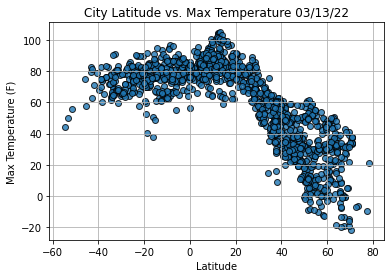

In [19]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

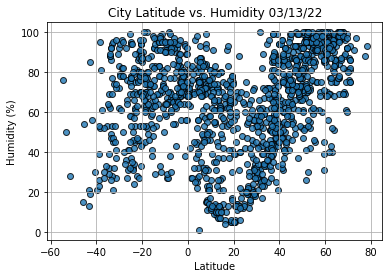

In [20]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

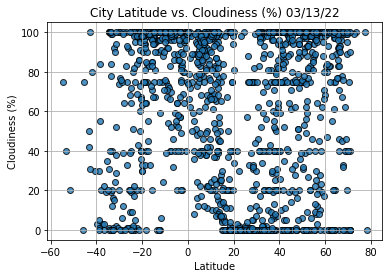

In [21]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

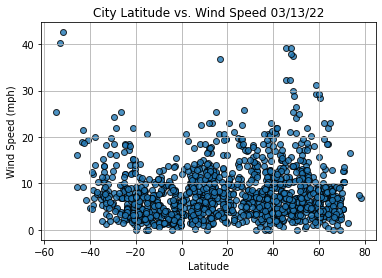

In [22]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()